In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_d4 = pd.read_json("data_d4_1.json")

In [3]:
df_d4 = pd.DataFrame(data_d4['info'].tolist())
df_d4.head()


,endOfGameResult,gameCreation,gameDuration,gameEndTimestamp,gameId,gameMode,gameName,gameStartTimestamp,gameType,gameVersion,mapId,participants,platformId,queueId,teams,tournamentCode
0,GameComplete,1743031008938,2135,1743033167555,5254369051,CLASSIC,teambuilder-match-5254369051,1743031031891,MATCHED_GAME,15.6.668.2516,11,"[{'PlayerScore0': 0, 'PlayerScore1': 0, 'Playe...",NA1,420,"[{'bans': [{'championId': 53, 'pickTurn': 1}, ...",
1,GameComplete,1743018056828,2416,1743020494839,5254274939,CLASSIC,teambuilder-match-5254274939,1743018078461,MATCHED_GAME,15.6.668.2516,11,"[{'PlayerScore0': 0, 'PlayerScore1': 0, 'Playe...",NA1,420,"[{'bans': [{'championId': 43, 'pickTurn': 1}, ...",
2,GameComplete,1743015586717,1306,1743016977238,5254259139,CLASSIC,teambuilder-match-5254259139,1743015671457,MATCHED_GAME,15.6.668.2516,11,"[{'PlayerScore0': 0, 'PlayerScore1': 0, 'Playe...",NA1,420,"[{'bans': [{'championId': 42, 'pickTurn': 1}, ...",
3,GameComplete,1743013608024,1615,1743015254390,5254248943,CLASSIC,teambuilder-match-5254248943,1743013639101,MATCHED_GAME,15.6.668.2516,11,"[{'PlayerScore0': 0, 'PlayerScore1': 0, 'Playe...",NA1,420,"[{'bans': [{'championId': 420, 'pickTurn': 1},...",
4,GameComplete,1742968117799,2198,1742970478497,5254094674,CLASSIC,teambuilder-match-5254094674,1742968280349,MATCHED_GAME,15.6.668.2516,11,"[{'PlayerScore0': 0, 'PlayerScore1': 0, 'Playe...",NA1,420,"[{'bans': [{'championId': 42, 'pickTurn': 1}, ...",


In [4]:
participant_data = [c for p in df_d4['participants'] for c in p[:10]]
df_participants = pd.DataFrame(participant_data)


In [38]:
cleaned = df_participants.apply(lambda row: row.map(lambda x: str(x) if isinstance(x, dict) else x), axis=1)
cleaned = cleaned.drop_duplicates()

In [36]:
print(df_participants.shape)
print(cleaned.shape)

(40800, 145)
(40500, 145)


In [42]:
cleaned.head()

,PlayerScore0,PlayerScore1,PlayerScore10,PlayerScore11,PlayerScore2,PlayerScore3,PlayerScore4,PlayerScore5,PlayerScore6,PlayerScore7,...,turretKills,turretTakedowns,turretsLost,unrealKills,visionClearedPings,visionScore,visionWardsBoughtInGame,wardsKilled,wardsPlaced,win
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,3,3,0,0,25,0,2,13,True
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,3,3,0,0,33,5,6,6,True
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5,7,3,0,0,13,0,3,8,True
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,4,3,0,0,35,0,3,11,True
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,2,3,0,0,68,4,2,29,True


In [49]:
cleaned.iloc[501]['championName']

'Amumu'

In [75]:
grouped = cleaned.groupby('championName')
casts = grouped[['spell1Casts', 'spell2Casts', 'spell3Casts', 'spell4Casts']].mean().sum(axis=1).sort_values(ascending=False)

In [76]:
casts.head()

championName
Nidalee       708.750000
Zeri          552.290503
Karthus       529.730263
Cassiopeia    529.519608
Riven         499.044177
dtype: float64

<Axes: xlabel='championName'>

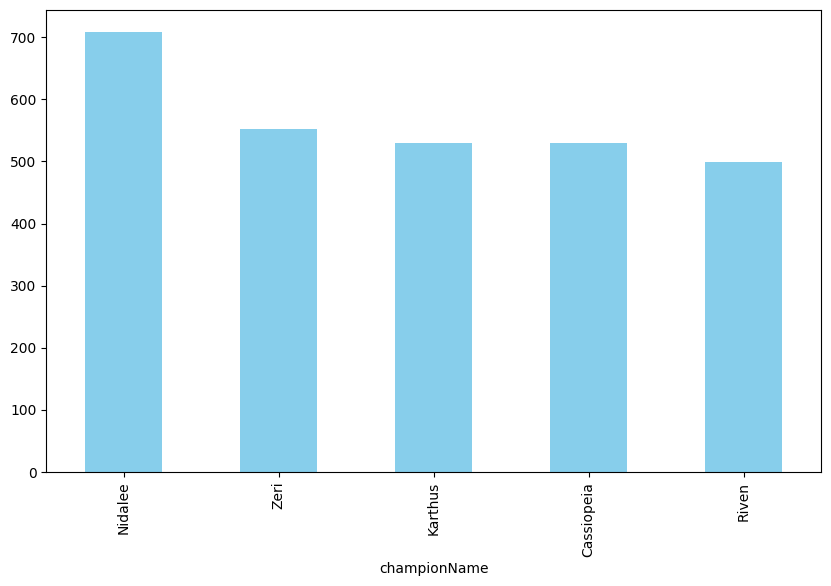

In [87]:
casts[:5].plot(kind='bar', figsize=(10, 6), color='skyblue')

<Axes: xlabel='championName'>

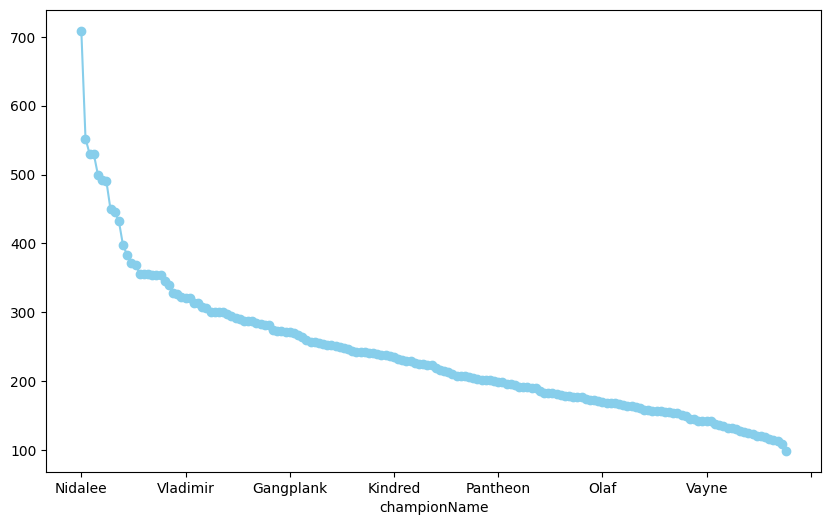

In [86]:
casts.plot(kind='line', figsize=(10, 6), color='skyblue', marker='o')

In [ ]:
# IDEAS
# correlate with champion winrate
# correlate with champion pickrate
# correlate with champion banrate
# correlate with average rank

# per champion,
# correlate apm with rank
# correlate 